# Google Trends Exploration and Cleaing

Code for light exploration and cleaning of Google Trends data

In [1]:
#import
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read in google trends data
trend_1 = pd.read_csv('/floyd/home/Capstone/cap_notebooks/notebooks/Scappers/gtrend_2018_2020.csv')

In [5]:
trend_1.head()

,date,depression,anxiety,government,politics,democracy,isPartial
0,2018-01-01 00:00:00,9,11,8,3,1,False
1,2018-01-01 01:00:00,9,11,8,3,1,False
2,2018-01-01 02:00:00,10,12,9,3,1,False
3,2018-01-01 03:00:00,10,12,10,3,1,False
4,2018-01-01 04:00:00,10,11,9,3,1,False


In [6]:
trend_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70840 entries, 0 to 70839
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        70838 non-null  object
 1   depression  70838 non-null  object
 2   anxiety     70838 non-null  object
 3   government  70838 non-null  object
 4   politics    70838 non-null  object
 5   democracy   70838 non-null  object
 6   isPartial   70838 non-null  object
dtypes: object(7)
memory usage: 3.8+ MB


In [8]:
#checking duplicates
trend_1.duplicated().sum()

4097

In [10]:
#dropping duplicates
trend_1.drop_duplicates(inplace=True)

In [11]:
trend_1.head()

,date,depression,anxiety,government,politics,democracy,isPartial
0,2018-01-01 00:00:00,9,11,8,3,1,False
1,2018-01-01 01:00:00,9,11,8,3,1,False
2,2018-01-01 02:00:00,10,12,9,3,1,False
3,2018-01-01 03:00:00,10,12,10,3,1,False
4,2018-01-01 04:00:00,10,11,9,3,1,False


In [62]:
#dropping row 170
trend_1.drop(170, inplace=True)

In [68]:
#reformatting date col
trend_1['date'] = pd.to_datetime(trend_1['date'], format='%Y-%m-%d %H:%M:%S')

In [69]:
trend_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66742 entries, 0 to 70693
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        66741 non-null  datetime64[ns]
 1   depression  66741 non-null  object        
 2   anxiety     66741 non-null  object        
 3   government  66741 non-null  object        
 4   politics    66741 non-null  object        
 5   democracy   66741 non-null  object        
 6   isPartial   66741 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 4.1+ MB


In [81]:
#checking for null values
trend_1[trend_1.isna().any(axis=1)]

,date,depression,anxiety,government,politics,democracy,isPartial
18116,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#dropping null row
trend_1.drop(18116, inplace=True)

In [85]:
#sorting data on dates
trend_1.sort_values('date', inplace=True)

In [103]:
#reviewing columns
trend_1.columns

Index(['date', 'depression', 'anxiety', 'government', 'politics', 'democracy',
       'isPartial'],
      dtype='object')

In [104]:
#converting cols to int
trend_1[['depression', 'anxiety', 'government', 'politics', 'democracy']] = trend_1[['depression', 'anxiety', 'government', 'politics', 'democracy']].astype(int)

In [123]:
#setting date as index
trend_1.set_index('date', inplace=True)

In [128]:
#resample trend data to month by mean scores
trend_monthly = trend_1.resample('M').mean()

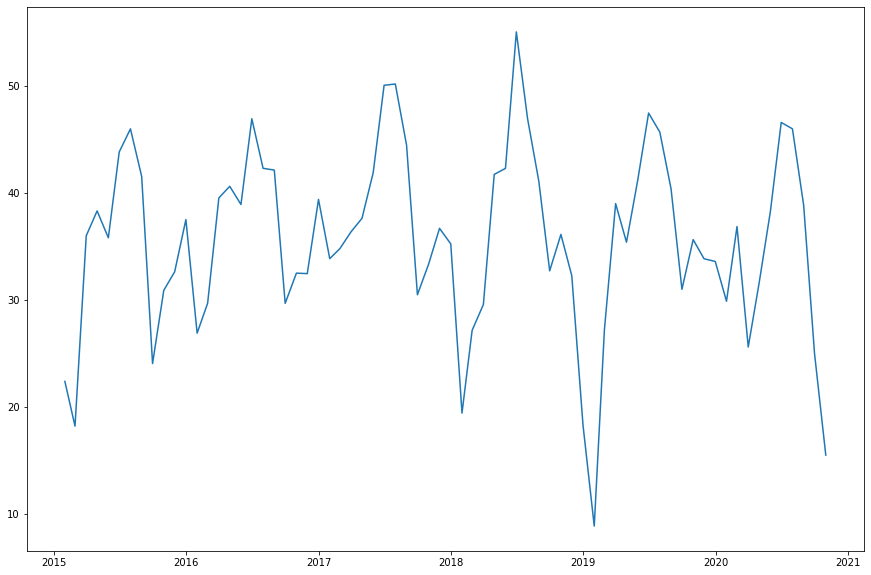

In [131]:
#plotting depression searches over time
plt.figure(figsize=(15,10))
plt.plot(trend_monthly.index, trend_monthly['depression'])
plt.show()

In [134]:
#reseting inde
trend_1.reset_index(inplace=True)

In [135]:
trend_1.head()

,date,depression,anxiety,government,politics,democracy,isPartial
0,2015-01-01 00:00:00,17,18,20,14,2,False
1,2015-01-01 01:00:00,18,18,22,13,2,False
2,2015-01-01 02:00:00,18,19,20,11,1,False
3,2015-01-01 03:00:00,18,18,19,10,1,False
4,2015-01-01 04:00:00,17,18,55,10,1,False


In [136]:
#writing to file
trend_1.to_csv('gtrends_2015-2020_clean.csv')